# import required libraries and packages

In [244]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix



from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')


# import the data

In [245]:
import pathlib
print(pathlib.Path().absolute())

C:\Users\hp


In [246]:
df = pd.read_csv('Churn.csv')
display(df.head(5))
#print the first 5 rows

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


**customer churn:**

When an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company is called customer churn.

 a customer have cancelled a service for a variety of reasons including lack of usage, poor service or better price.

# Attribute Information

Account_Length: the number of days the customer has the subscription with the telecom company

Vmail_Message: the total number of voicemails the customer has sent

Total_mins: the total number of minutes the customer has talked over the phone

CustServ_Calls: the number of customer service calls the customer made

Churn: yes and no - indicating whether or not the customer has churned

Intl_Plan: yes and no - indicating whether or not the customer has international plan or not

Vmail_Plan: yes and no - indicating whether or not the customer has voicemail plan or not

Total_calls: the total number of calls the customer has made

Total_charges: the total amount of bill in $ the customer has paid

In [247]:
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [248]:
df['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

there 5 object columns these are Churn , Intl_Plan, Vmail_Plan  , State  , Phone  

**as we dont need state and phone coloumns to predict churn ,we can drop this or delect these columns.**

In [250]:
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)
display(df.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02


In [251]:
 display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

None

# Data Preprocessing

In [252]:
print(df['Churn'].unique()) #Get Unique Values from Multiple Columns. 
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


In [253]:
df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


we replace churn,Intl_Plan,Vmail_Plan obect value no = 0 and yes = 1 ,so to transform obeject type data set to intiger

In [254]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

now there is no object type data set in this data frame

# Checking for Missing values

In [255]:
df.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
dtype: int64

so there is no missing values in this dataset

# target variable

In [256]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

# Feature and target variable separation

In [257]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print("Features:" ,X.shape)
print("Targets:" ,y.shape)

Features: (3333, 17)
Targets: (3333, 1)


# Format the Data

As scikit learn dession tree does not support categorical column,we need to transfrom the categorical columns into multiple columns of binary values and its called one hot encoding.

* there are two ways that can transfrom categorical values into binary or intiger values.

Label Encoding:
Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.



Challenges with Label Encoding
In the above scenario, the state names do not have an order or rank. But, when label encoding is performed, the state names are ranked based on the alphabets. Due to this, there is a very high probability that the model captures the relationship between state such as IL < MA < LA.


 

One-Hot Encoding
One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

One-Hot Encoding is the process of creating dummy variables.

We apply One-Hot Encoding when:

The categorical feature is not ordinal (like the state above)
The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
 The number of categories is quite large as one-hot encoding can lead to high memory consumption
 
 
 **In this dataset, there are three categorical features are NAN columns. So, they are not ordinal and also in number there are less number of categorical variables.**

**In addition, each label is assigned a unique integer based on alphabetical ordering in Label Encoding technique. And prediction performance is not also better than One-hot encoding for this data set.**

**That's why I am choosing One-hot encoding**

# One-hot encoding

In [258]:
df = pd.get_dummies(df, drop_first=True)



# split the data into train and test set

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=y)

#stratify=y means the ratio of test and train set remain same.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


In [260]:

class_0_train = y_train['Churn'].value_counts().values[0]
class_1_train = y_train['Churn'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print(train_ratio)

0.1692982456140351


In [261]:
class_0_test = y_test['Churn'].value_counts().values[0]
class_1_test = y_test['Churn'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print(test_ratio)

0.17017543859649123


# Training: Decision Tree Classifier

In [262]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# Prediction

In [263]:
y_pred = model.predict(X_test)

# Prediction Comparison with the test data

In [264]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Churn'] = y_pred

display(y_test.sample(10))

,Churn,probability,predicted_Churn
2583,0,0.0,0
2179,0,0.0,0
1533,1,1.0,1
630,0,0.0,0
1119,0,0.0,0
140,0,0.0,0
438,0,0.0,0
1974,1,1.0,1
1233,0,0.0,0
1966,0,0.0,0


In [265]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,probability,predicted_Churn
3059,116,35,118.0,167.2,205.7,11.8,2,0,1,103,20.06,106,14.21,102,9.26,2,3.19,0,0.0,0
3239,87,33,125.0,235.3,215.3,10.2,2,0,1,99,21.25,81,20.00,95,9.69,7,2.75,0,0.0,0
1842,97,0,276.1,201.1,231.3,8.9,0,0,0,82,46.94,106,17.09,73,10.41,4,2.40,1,1.0,1
2838,178,35,175.4,190.0,138.7,10.5,2,0,1,88,29.82,65,16.15,94,6.24,3,2.84,0,0.0,0
2309,4,0,145.3,303.8,206.1,8.9,0,1,0,89,24.70,93,25.82,82,9.27,4,2.40,0,0.0,0
382,149,0,176.2,145.0,249.5,5.7,0,1,0,87,29.95,81,12.33,92,11.23,4,1.54,0,0.0,0
206,122,0,243.8,83.9,179.8,13.7,2,0,0,98,41.45,72,7.13,84,8.09,8,3.70,0,0.0,0
2379,56,0,164.3,233.7,187.3,11.8,2,0,0,92,27.93,107,19.86,104,8.43,1,3.19,0,0.0,0
1518,104,0,139.7,202.6,203.6,11.3,2,0,0,78,23.75,119,17.22,102,9.16,5,3.05,0,0.0,0
1093,210,0,104.6,149.5,255.1,6.5,2,0,0,121,17.78,71,12.71,67,11.48,8,1.76,0,0.0,0


# Data Transformation (StandardScaler or MinMaxScaler)

In [266]:
scaler = StandardScaler() # For StandardScaler
scaler = MinMaxScaler() # For MinMaxScaler

print(scaler.fit(test))

#print(scaler.mean_) # For StandardScaler
print(scaler.data_max_) # For MinMaxScaler

MinMaxScaler()
[224.    50.   346.8  354.2  381.9   18.     9.     1.     1.   150.
  58.96 164.    30.11 164.    17.19  19.     4.86   1.     1.     1.  ]


In [267]:
print(scaler.transform(test.head(10)))

[[0.2735426  0.         0.46049596 0.48807579 0.23033708 0.77222222
  0.         1.         0.         0.57333333 0.46048168 0.27272727
  0.48808609 0.53174603 0.22996058 0.31578947 0.77160494 1.
  1.         1.        ]
 [0.53811659 0.         0.61476355 0.23717739 0.59343584 0.41666667
  0.11111111 0.         0.         0.52666667 0.614654   0.60330579
  0.23712529 0.50793651 0.59329829 0.21052632 0.41769547 0.
  0.         0.        ]
 [0.44394619 0.         0.30911188 0.12642927 0.33264341 0.53888889
  0.11111111 1.         0.         0.65333333 0.30902307 0.65289256
  0.1264412  0.62698413 0.33245729 0.21052632 0.53909465 0.
  0.         0.        ]
 [0.60986547 0.         0.60207612 0.57889579 0.52602011 0.61666667
  0.         0.         0.         0.8        0.60210312 0.47107438
  0.57878555 0.73015873 0.52562418 0.26315789 0.61728395 0.
  0.         0.        ]
 [0.84304933 0.         0.60063437 0.61613852 0.40035482 0.62777778
  0.33333333 0.         0.         0.70666667 0.

**Does Data Transformation improve model performance?**

No, Data transmission does not improve model performance.

**Is it necessary to standardize or normalize data for tree-based machine learning models?**
Tree-based algorithms are fairly insensitive to the scale of the features.And also Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units. So standardization or normalize is not needed before fitting this kind of models.

# Tree diagram of the Decision Tree

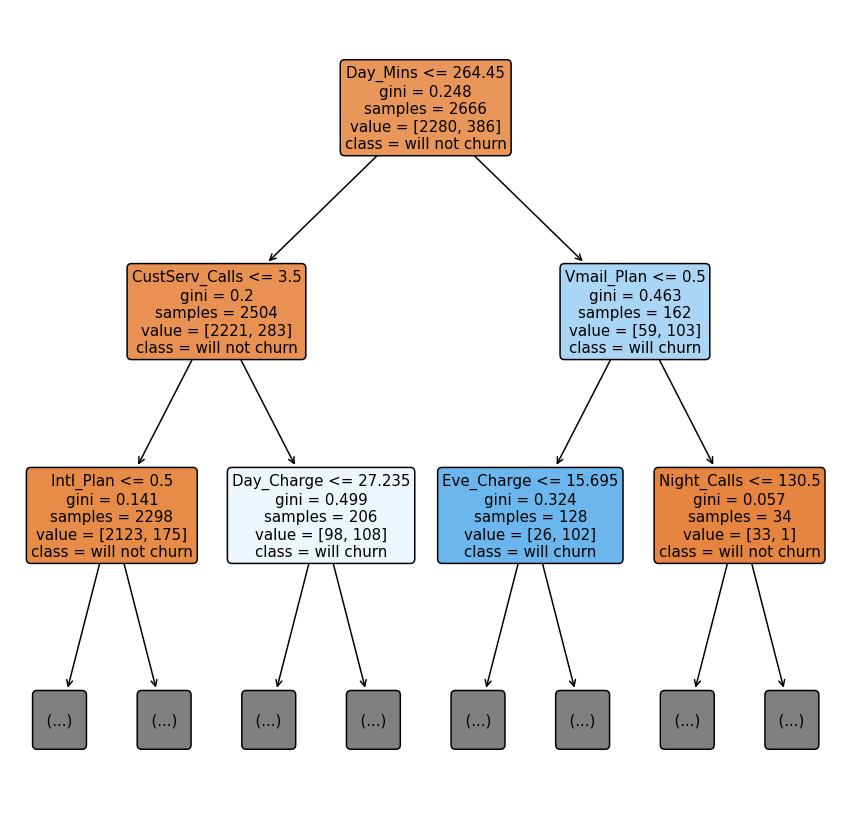

In [268]:
plt.figure(figsize = (15, 15))
plot_tree(model, 
          filled=True,
          rounded=True,
          class_names = ["will not churn", "will churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

# Confusion matrix

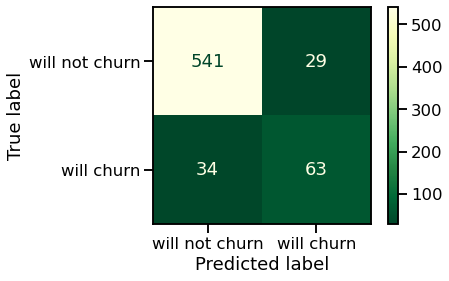

In [269]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='YlGn_r')
plt.show()

**In the confusion matrix, 544+26 = 570 people that did will not churn, 540 (81%) were correctly classified. 34 + 63 = 97 people that will churn, 63 (59.52%) were correctly classified.**

# classification report

In [270]:
print(classification_report(y_test['Churn'], y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       570
           1       0.68      0.65      0.67        97

    accuracy                           0.91       667
   macro avg       0.81      0.80      0.81       667
weighted avg       0.90      0.91      0.90       667



**REPORT:**

1. model accuracy is 91% means that 9 of every 100 labels is incorrect, and 91 is correct for predicting will not churn.

2. Precision= Out of all the examples that predicted as positive, how many are really positive? here 90% means that model predicted as positive(will not churn) (63 + 26 =89), but really positive (will churn) only 63 people.

3. Recall/sensitivity = Out of all the positive examples, how many are predicted as positive? Here 65% means that all positive are (34 +63 = 107), but model predicted as positive only 63.

4. F1-score: The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial

5. support: Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

# Grid Search and Cross-Validation with Decision Tree Classifier

In [271]:
#Maximum Feature means The number of features to consider when looking for the best split
parameters = {'criterion': ['gini','entropy'],
              
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)


# Best hyperparameters in the grid search

In [272]:
grid_result.best_params_

{'criterion': 'gini', 'max_depth': 6}

# Model performance evaluation with the best found model in grid search and cross-validation

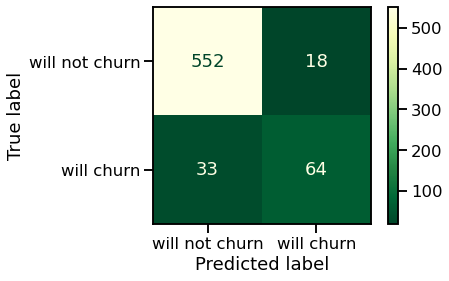

In [273]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='YlGn_r')
plt.show()

**In the confusion matrix, 552+18 = 570 people that did will not churn, 552 (81%) were correctly classified. 33 + 64 = 97 people that will churn, 64 (59.52%) were correctly classified.**

# Classification report

In [274]:
print(classification_report(y_test['Churn'], y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       570
           1       0.68      0.65      0.67        97

    accuracy                           0.91       667
   macro avg       0.81      0.80      0.81       667
weighted avg       0.90      0.91      0.90       667



**REPORT:**

1. model accuracy is 90% means that 10 of every 100 labels is incorrect, and 90 is correct for predicting will not churn.

2. Precision= Out of all the examples that predicted as positive, how many are really positive? here 90% means that model predicted as positive(will not churn) (64 + 33 =97), but really positive (will churn) only 63 people.

3. Recall/sensitivity = Out of all the positive examples, how many are predicted as positive? Here 64% means that all positive are (33 +64 = 97), but model predicted as positive only 64.

4. F1-score: The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial

5. support: Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

# ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

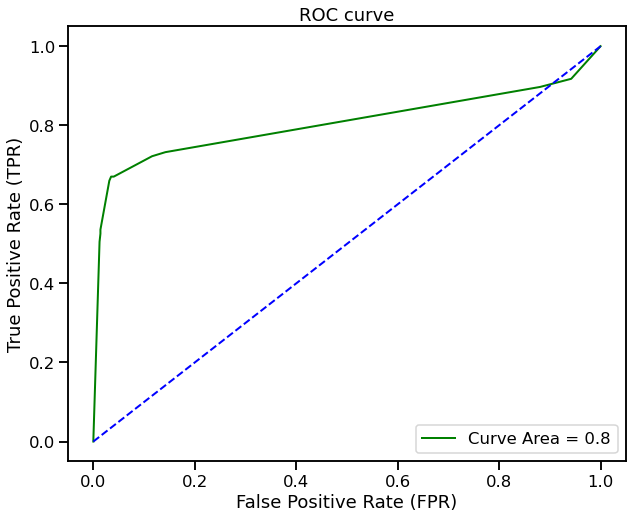

In [275]:
fpr, tpr, thr = roc_curve(y_test['Churn'], grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test['Churn'], y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Here model AUC value is 0.8 that means the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

In [276]:
print(classification_report(y_test['Churn'], y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       570
           1       0.68      0.65      0.67        97

    accuracy                           0.91       667
   macro avg       0.81      0.80      0.81       667
weighted avg       0.90      0.91      0.90       667



# Model Result

Model is saying 91% customers will churn.